# US Consumer Finance Complaints Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
%matplotlib inline
cf.go_offline()  



### The dataset contains consumer complaints about financial products and services collected and published by the CFPB

In [218]:
#Reading the data and storing it in a variable 
df=pd.read_csv('consumer_complaints.csv',low_memory=False)
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963


In [219]:
#checking for datatypes
df.dtypes

date_received                   object
product                         object
sub_product                     object
issue                           object
sub_issue                       object
consumer_complaint_narrative    object
company_public_response         object
company                         object
state                           object
zipcode                         object
tags                            object
consumer_consent_provided       object
submitted_via                   object
date_sent_to_company            object
company_response_to_consumer    object
timely_response                 object
consumer_disputed?              object
complaint_id                     int64
dtype: object

In [220]:
##View the shape of the dataset
rows=df.shape[0]
columns=df.shape[1]
print(f'The Datset has {rows} rows and {columns} columns')

The Datset has 555957 rows and 18 columns


### Observing the Data

In [221]:
#previewing the first 5 rows of the dataset
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [222]:
##previewing the last 5 rows of the dataset
df.tail()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
555952,07/01/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529
555953,07/01/2014,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550
555955,04/14/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963
555956,08/14/2014,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"CCS Financial Services, Inc.",NaN,NaN,NaN,NaN,Phone,08/18/2014,Closed with explanation,Yes,No,984116


In [223]:
#listing the columns in the dataset
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [224]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [225]:
#checking for missing values
missing_values=df.isnull().sum()
missing_values

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [226]:
total_cells=df.shape[0]*df.shape[1] # Total number of cells in the DataFrame rows * columns
total_missing=missing_values.sum() # Total number of missing values in the DataFrame
missing_percentage=(total_missing/total_cells)*100 # Percentage of missing values in the DataFrame
print(f"Total missing values: {total_missing}")
print(f"Percentage of missing values: {missing_percentage:.2f}%")

Total missing values: 2381530
Percentage of missing values: 23.80%


In [227]:
#checking for duplicates
df.duplicated().sum()


np.int64(0)

--------------------------------------------------------------------

## General Overview

• The dataset has 555957 rows and 18 columns(date_received,product,sub_product, issue, sub_issue,consumer_complaint_narrative, company_public_response,company,state, zipcode, tags, consumer_consent_provided,submitted_via, date_sent_to_company, company_response_to_consumer,timely_response, consumer_disputed, complaint_id)

• 2381530 missing values were found in the datset





-----------------------------------------------------------------------
### Exploratory Data Analysis

Run statistical summary of the dataset

•Complaints per year/month/day

•Average time taken by company to respond

•Most complained about products

•Which sub-products are driving complaints within each product

•What are the most common problems reported by consumers

•For a given problem what issues dominate

•Which companies get the most complaints

•How do their responses types differ

•Do they respond on time

•Complaints by state

•Regional patterns of financial complaints

•Sentiment analysis

•How many consumers allowed narrative sharing

•how often do consumers dispute the company's response

•is there a link between response type and disputes







In [228]:
#Statistical summary of numerical columns
df.describe()

,complaint_id
count,5.559570e+05
mean,9.600510e+05
std,5.504296e+05
min,1.000000e+00
25%,4.863230e+05
50%,9.737830e+05
75%,1.441702e+06
max,1.895894e+06


### Data Cleaning Pipeline

To prepare the dataset for analysis. I created reusable cleaning functions and applied them using pipe()

In [229]:
#information of the dataset before cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [230]:
#first 5 rows of the datset before cleaning
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [231]:
#Data Cleaning

def clean_data(df):
    df=df.copy()
    col_fill = ['sub_product', 'sub_issue','consumer_complaint_narrative','state', 'consumer_consent_provided','tags']
    dat_cols = ['date_sent_to_company', 'date_received']    
    # Fill missing values
    for col in col_fill:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown')
    df['company_public_response']=df['company_public_response'].replace(['nan','NaN','NA','', 'None'],'No Response').fillna('No Response')

    if 'zipcode' in df.columns:
        df['zipcode'] = df['zipcode'].fillna('00000').astype(str).str.zfill(5)
    
    for col in dat_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    if 'state' in df.columns:
        df['state'] = df['state'].replace(['XX','NA','Xx'], 'Unknown').astype('category')
    
    return df


def clean_columns(df):
    df=df.copy()
    
    str_cols=df.select_dtypes(include='object').columns
    df[str_cols]=df[str_cols].apply(lambda x: x.str.strip().str.title())
    
    # Convert categorical columns to 'category' dtype
    cat_cols = ['timely_response', 'consumer_disputed?', 'submitted_via', 'company_response_to_consumer']
    for col in cat_cols:
         if col in df.columns:
            df[col] = df[col].astype('category')

    
    return df

# Applying the cleaning functions using pipe
df = (df
              .pipe(clean_data)
              .pipe(clean_columns)
)



df.info()

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  object        
 2   sub_product                   555957 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     555957 non-null  object        
 5   consumer_complaint_narrative  555957 non-null  object        
 6   company_public_response       555957 non-null  object        
 7   company                       555957 non-null  object        
 8   state                         555957 non-null  category      
 9   zipcode                       555957 non-null  object        
 10  tags                          555957 non-null  object        
 11  consumer_cons

In [232]:
#previewing cleaned data
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other Mortgage,"Loan Modification,Collection,Foreclosure",Unknown,Unknown,No Response,U.S. Bancorp,CA,95993,Unknown,Unknown,Referral,2013-09-03,Closed With Explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other Mortgage,"Loan Servicing, Payments, Escrow Account",Unknown,Unknown,No Response,Wells Fargo & Company,CA,91104,Unknown,Unknown,Referral,2013-09-03,Closed With Explanation,Yes,Yes,511080
2,2013-08-30,Credit Reporting,Unknown,Incorrect Information On Credit Report,Account Status,Unknown,No Response,Wells Fargo & Company,NY,11764,Unknown,Unknown,Postal Mail,2013-09-18,Closed With Explanation,Yes,No,510473
3,2013-08-30,Student Loan,Non-Federal Student Loan,Repaying Your Loan,Repaying Your Loan,Unknown,No Response,"Navient Solutions, Inc.",MD,21402,Unknown,Unknown,Email,2013-08-30,Closed With Explanation,Yes,Yes,510326
4,2013-08-30,Debt Collection,Credit Card,False Statements Or Representation,Attempted To Collect Wrong Amount,Unknown,No Response,Resurgent Capital Services L.P.,GA,30106,Unknown,Unknown,Web,2013-08-30,Closed With Explanation,Yes,Yes,511067


In [233]:
#checking for missing values
df.isnull().sum()

date_received                   0
product                         0
sub_product                     0
issue                           0
sub_issue                       0
consumer_complaint_narrative    0
company_public_response         0
company                         0
state                           0
zipcode                         0
tags                            0
consumer_consent_provided       0
submitted_via                   0
date_sent_to_company            0
company_response_to_consumer    0
timely_response                 0
consumer_disputed?              0
complaint_id                    0
dtype: int64

## EDA ANSWERS
------------------------------------------------------------------------------------------

### TIME BASED ANALYSIS


1) Complaints per year/month/day


These are the complaints per year 
2011      2549
2012     72523
2013    108273
2014    153138
2015    168621
2016     50853
Name: consumer_complaint_narrative, dtype: int64

These are the complaints per month 
month_name
Jan    52113
Feb    51719
Mar    59409
Apr    48986
May    41680
Jun    42967
Jul    45403
Aug    45439
Sep    41948
Oct    43804
Nov    39626
Dec    42863
Name: consumer_complaint_narrative, dtype: int64

These are the complaints per month 
1     16730
2     17344
3     17333
4     17979
5     18999
6     18715
7     18515
8     18596
9     18725
10    19119
11    19358
12    18759
13    17732
14    18465
15    18962
16    18337
17    18801
18    18834
19    18831
20    18307
21    18355
22    18218
23    18736
24    18508
25    16965
26    17751
27    17128
28    17119
29    17769
30    16771
31    10196
Name: consumer_complaint_narrative, dtype: int64



C:\Users\lizzy\AppData\Local\Temp\ipykernel_15636\1063688970.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



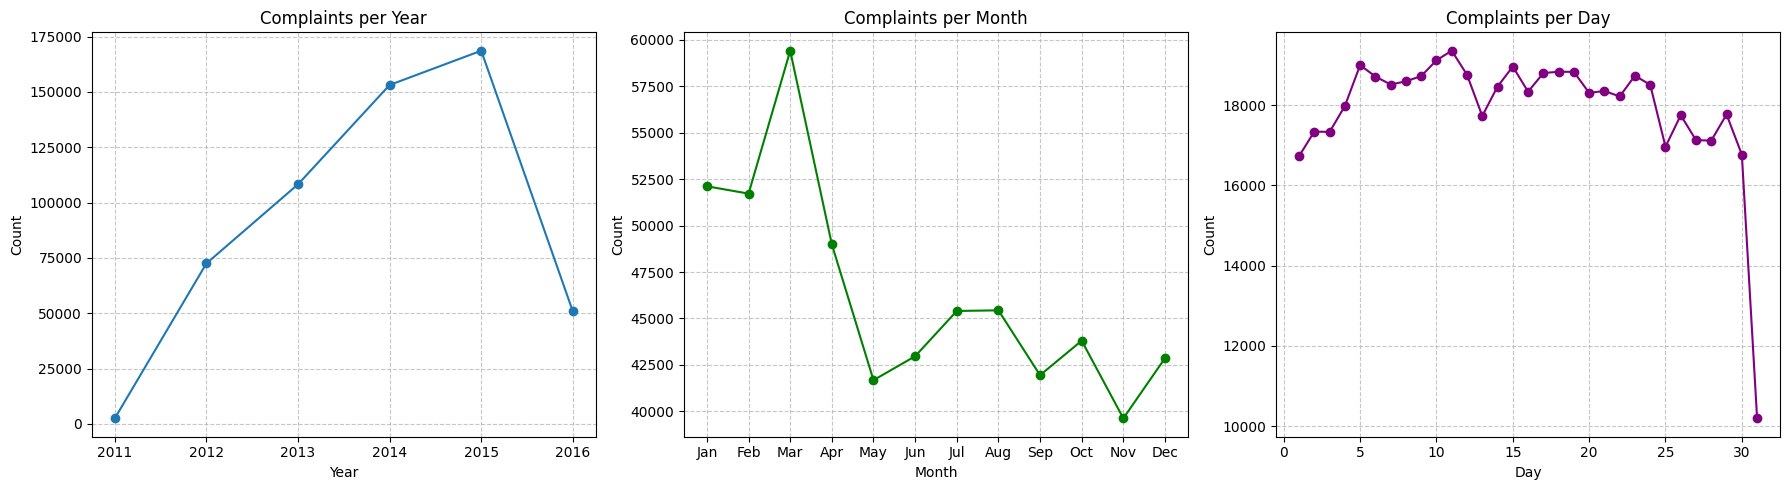

In [234]:
cols_to_use=['date_received','date_sent_to_company','consumer_complaint_narrative']
complaints_analysis=df[cols_to_use]
complaints_analysis['date_received_year']=complaints_analysis['date_received'].dt.year
complaints_analysis['month_num'] = complaints_analysis['date_received'].dt.month
complaints_analysis['month_name'] = complaints_analysis['date_received'].dt.strftime('%b') 
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
complaints_analysis['month_name'] = pd.Categorical(complaints_analysis['month_name'], categories=month_order, ordered=True)
complaints_analysis['date_received_day']=complaints_analysis['date_received'].dt.day
#------------------------------------------------------------------------------------------------#
complaints_per_year=complaints_analysis.groupby('date_received_year',)['consumer_complaint_narrative'].count()
complaints_per_year.index.name = None
print(f'These are the complaints per year \n{complaints_per_year}')
print()
#------------------------------------------------------------------------------------------------#
complaints_per_month = complaints_analysis.groupby('month_name')['consumer_complaint_narrative'].count()
print(f'These are the complaints per month \n{complaints_per_month}')
print()
#------------------------------------------------------------------------------------------------#
complaints_per_day=complaints_analysis.groupby('date_received_day')['consumer_complaint_narrative'].count()
complaints_per_day.index.name = None
print(f'These are the complaints per month \n{complaints_per_day}')
print()
#------------------------------------------------------------------------------------------------#
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Yearly complaints
axes[0].plot(complaints_per_year.index, complaints_per_year.values, marker='o')
axes[0].set_title('Complaints per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')


# Monthly complaints
axes[1].plot(complaints_per_month.index, complaints_per_month.values, marker='o', color='green')
axes[1].set_title('Complaints per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')


# Daily complaints
axes[2].plot(complaints_per_day.index, complaints_per_day.values, marker='o', color='purple')
axes[2].set_title('Complaints per Day')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Count')

for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.7)



plt.tight_layout()  # Prevent overlap
plt.show()



2) Average time taken by company to respond


Average response time= 0.03 days


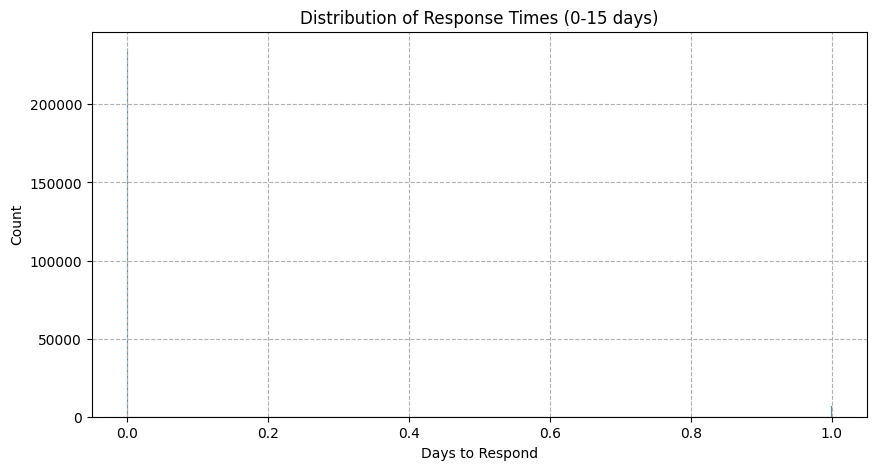

In [235]:
#column selection for time analysis
cols_to_use=['date_received','date_sent_to_company']
time_analysis=df[cols_to_use]
 
 #CFPB only allows 0–15 days
time_analysis['days_to_respond']=(time_analysis['date_received'] - time_analysis['date_sent_to_company']).dt.days
time_analysis=time_analysis.query("0 <= days_to_respond <= 15")
avg_response=time_analysis['days_to_respond'].mean()
print(f"Average response time= {avg_response:.2f} days")

#plotting the distribution of response times
plt.figure(figsize=(10,5))
sns.histplot(x=time_analysis['days_to_respond'])
plt.title('Distribution of Response Times (0-15 days)')
plt.xlabel('Days to Respond')
plt.grid(True, linestyle='--', alpha=1)
plt.show()

### Product/Sub-Product Focus


3) Most complained about Products


These are the top 10 complained about products 
1. Mortgage
2. Debt Collection
3. Credit Reporting
4. Credit Card
5. Bank Account Or Service
6. Consumer Loan
7. Student Loan
8. Payday Loan
9. Money Transfers
10. Prepaid Card


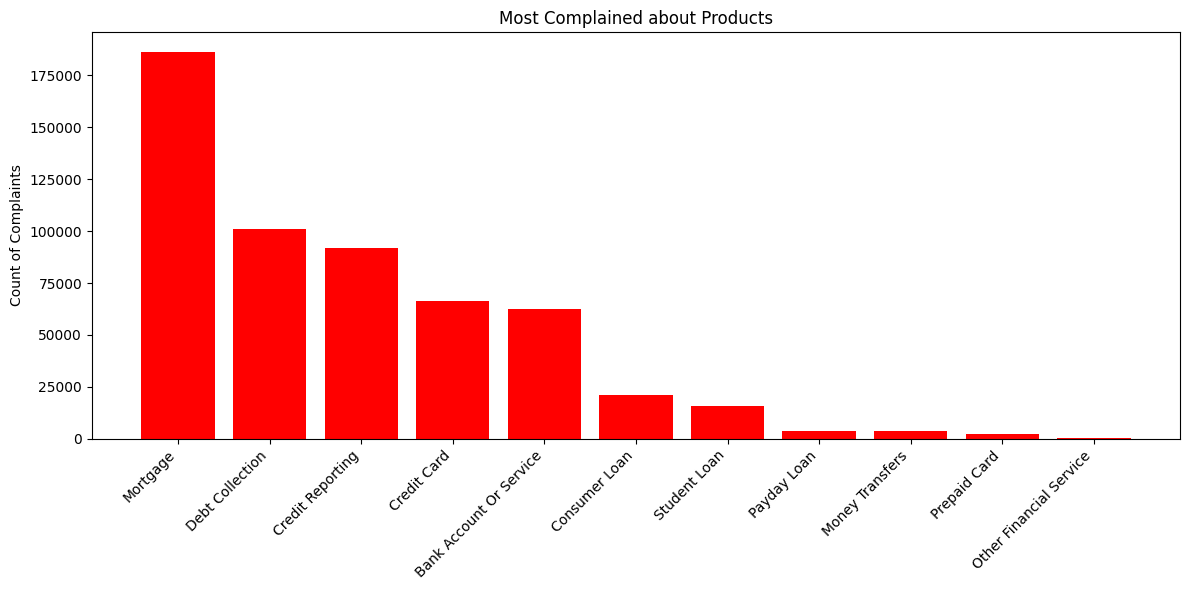

In [236]:
#complaint focus on products
most_complained_product=df['product'].value_counts()
top10_complained_product_list=df['product'].value_counts().head(10).index.tolist()
most_complained_product.index.name=None
print(f'These are the top 10 complained about products ')
for i, x in enumerate(top10_complained_product_list, start=1):
    print(f"{i}. {x}")

#plotting most complained products
fig,axes=plt.subplots(figsize=(12,6))
index=most_complained_product.index
values=most_complained_product.values
axes.bar(index,values,color='red')
axes.set_ylabel("Count of Complaints")
axes.set_title("Most Complained about Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4) Which sub-products are driving complaints within each product

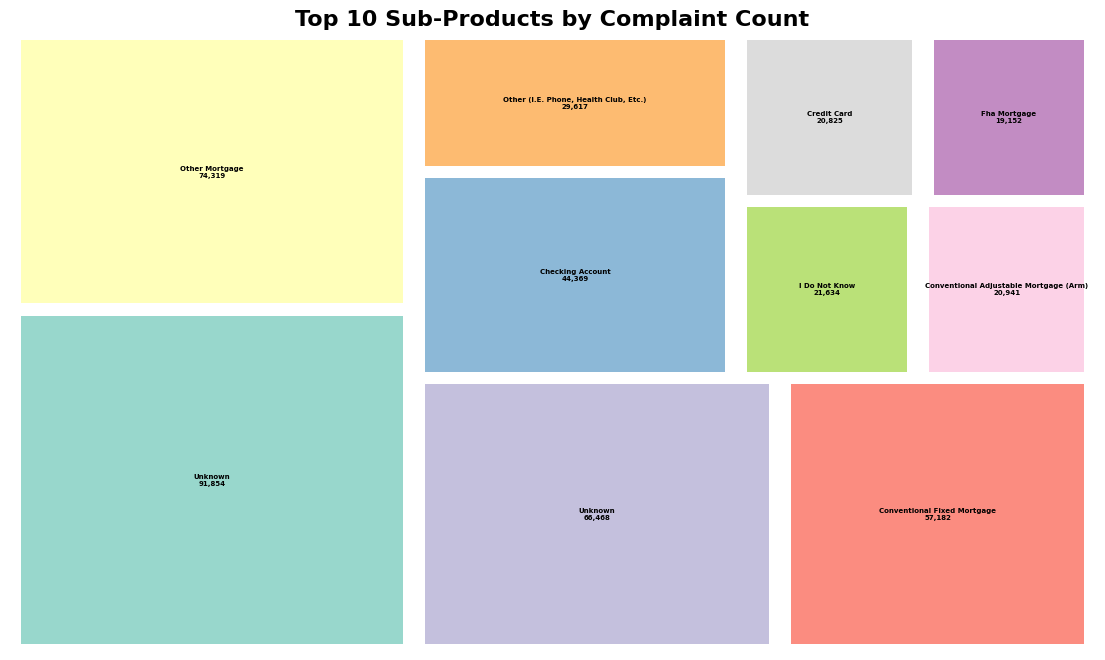

In [237]:
#treemap of sub-products with most complaints

counts=df.groupby(['product','sub_product'])['complaint_id'].count().reset_index()
counts = counts.sort_values('complaint_id', ascending=False).head(10)


labels = [f"{sp}\n{val:,}" for sp, val in zip(counts['sub_product'], counts['complaint_id'])]

plt.figure(figsize=(14,8))
squarify.plot(
    sizes=counts['complaint_id'],
    label=labels,
    alpha=0.9,
    color=plt.cm.Set3.colors,        # softer, readable palette
    text_kwargs={'fontsize':5, 'weight':'bold', 'color':'black'},
    pad=True,                        # spacing around rectangles
)
plt.axis('off')
plt.title("Top 10 Sub-Products by Complaint Count", fontsize=16, weight='bold')
plt.show()









### Issues/Sub-Issues

5) Most common problems reported by consumers


These are top 10 common issues reported by consumers
1. Loan Modification,Collection,Foreclosure
2. Incorrect Information On Credit Report
3. Loan Servicing, Payments, Escrow Account
4. Cont'D Attempts Collect Debt Not Owed
5. Account Opening, Closing, Or Management
6. Communication Tactics
7. Disclosure Verification Of Debt
8. Deposits And Withdrawals
9. Application, Originator, Mortgage Broker
10. Billing Disputes


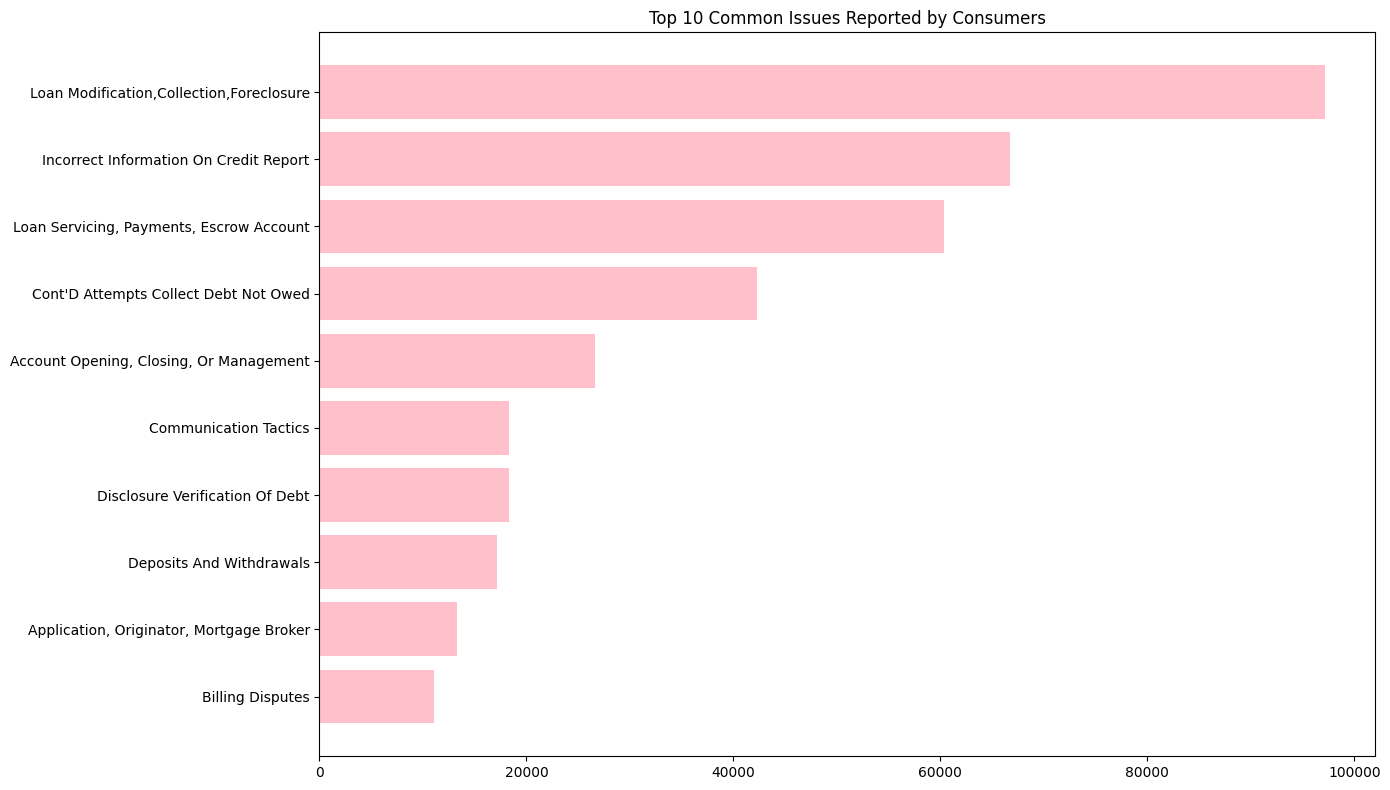

In [238]:
### Issues/Sub-Issues
common_issues=df['issue'].value_counts()
top10_issues_list=df['issue'].value_counts().head(10).index.tolist()

print('These are top 10 common issues reported by consumers')
for i, x in enumerate(top10_issues_list, start=1):
    print(f"{i}. {x}")

#Stacked bar chart for top 10 common issues
fig,ax=plt.subplots(figsize=(14,8))
ax.barh(common_issues.head(10).index, common_issues.head(10).values, color='pink')
axes.set_xlabel("Count of Complaints")
ax.set_title("Top 10 Common Issues Reported by Consumers")
plt.gca().invert_yaxis()  # Highest values on top
plt.tight_layout()
plt.show()


6) For a given product what issues dominate

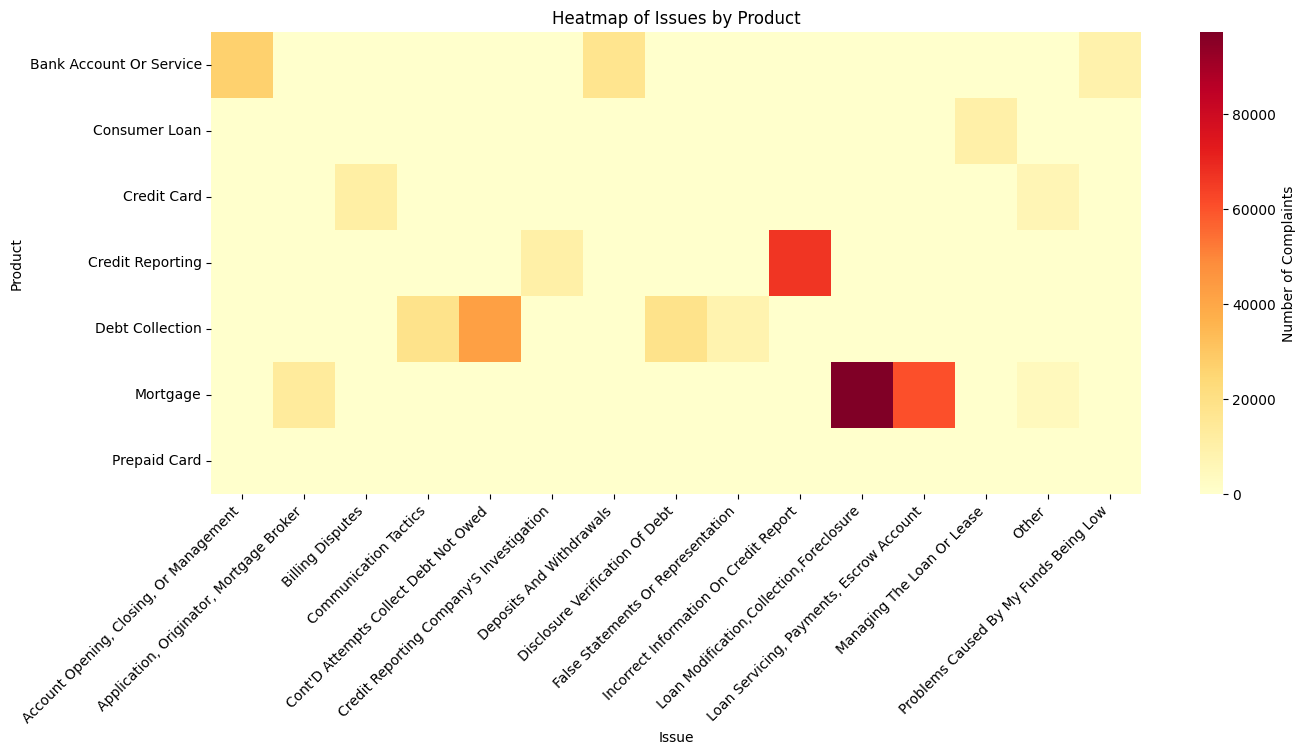

In [239]:
#top 10 issues for each product
top_issues=df['issue'].value_counts().head(15).index
prod_issues=df[df['issue'].isin(top_issues)].pivot_table(values='complaint_id',index='product',columns='issue',aggfunc='count',fill_value=0)
prod_issues.head()

#heatmap for top 10 issues for each product
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(prod_issues,cmap="YlOrRd", cbar_kws={'label': 'Number of Complaints'})
plt.title('Heatmap of Issues by Product')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Issue')
plt.ylabel('Product')
plt.show()


### Company Analysis

7) Which companies get the most complaints

In [240]:
df['company'].value_counts()

company
Bank Of America                55998
Wells Fargo & Company          42024
Jpmorgan Chase & Co.           33881
Equifax                        31828
Experian                       30905
                               ...  
Nations Trust Mortgage Corp        1
Alliance Capital Corp.             1
Tsarouhis Law Group, Llc           1
Aaa Collectors, Inc.               1
Turbo Cash, Llc                    1
Name: count, Length: 3605, dtype: int64

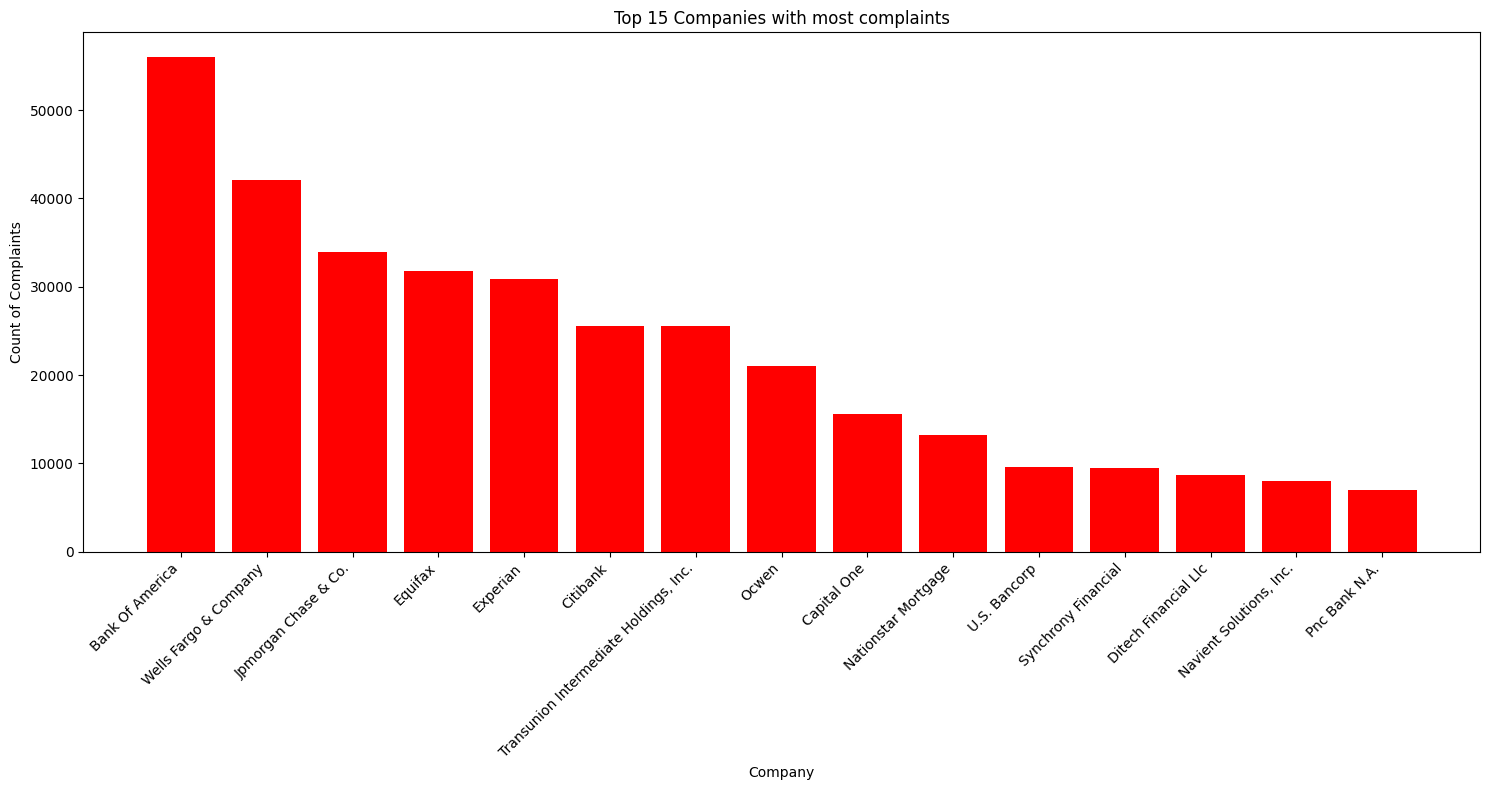

In [241]:
#top 15 companies gotten through groupby
top15_compamies_complaints=df.groupby('company')['complaint_id'].size().sort_values(ascending=False).head(15)
top15_compamies_complaints

#Bar for the companies with most complaints
fig,axes=plt.subplots(figsize=(15,8))
axes.bar(top15_compamies_complaints.index,top15_compamies_complaints.values,color='red')
plt.title('Top 15 Companies with most complaints')
plt.xlabel('Company')
plt.ylabel('Count of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

8) How do their response type differ

C:\Users\lizzy\AppData\Local\Temp\ipykernel_15636\3137551428.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



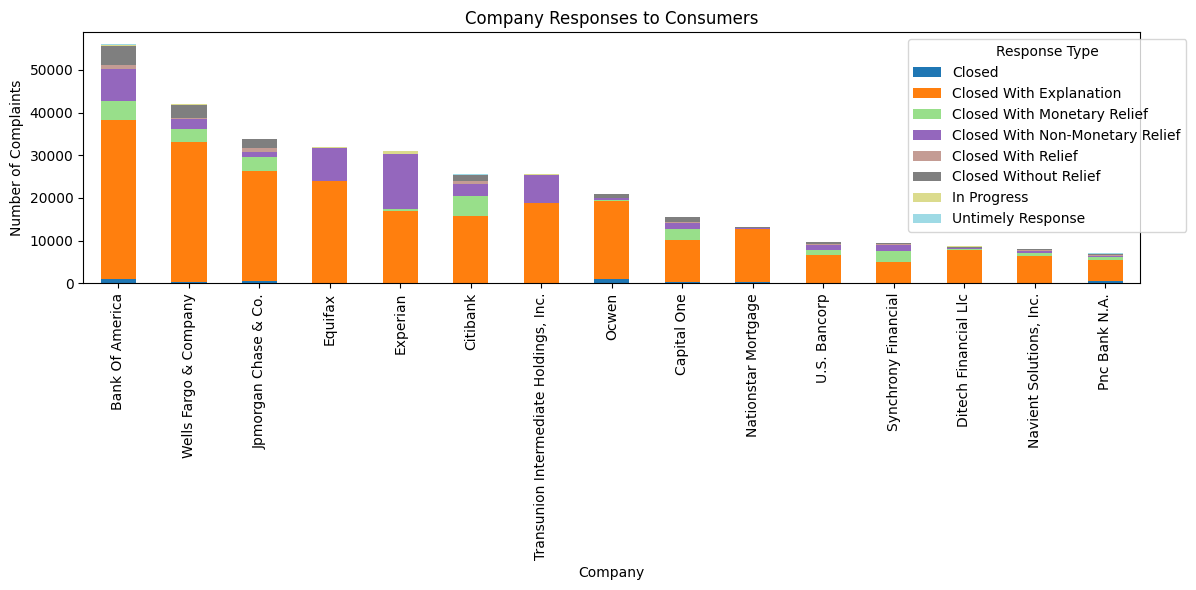

company_response_to_consumer,Closed,Closed With Explanation,Closed With Monetary Relief,Closed With Non-Monetary Relief,Closed With Relief,Closed Without Relief,In Progress,Untimely Response
company,,,,,,,,
Bank Of America,976,37212,4413,7640,867,4531,232,127
Wells Fargo & Company,271,32809,3045,2362,326,2842,357,12
Jpmorgan Chase & Co.,587,25722,3253,1308,813,2011,184,3
Equifax,40,23877,22,7645,0,0,244,0
Experian,139,16899,398,12776,0,0,693,0
Citibank,139,15700,4689,2758,680,1347,124,103
"Transunion Intermediate Holdings, Inc.",16,18805,94,6394,0,0,225,0
Ocwen,1085,18245,162,401,136,902,44,3
Capital One,176,10068,2499,1313,384,1135,50,3


In [242]:
# Pivot table
response_diff = df.pivot_table(
    index='company',
    columns='company_response_to_consumer',
    values='complaint_id',
    aggfunc='count',
    fill_value=0
)

# Keep top 15 companies by total complaints
response_diff['Total'] = response_diff.sum(axis=1)
response_diff = response_diff.sort_values('Total', ascending=False).head(15).drop(columns='Total')

# Stacked bar chart
response_diff.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title("Company Responses to Consumers")
plt.xlabel("Company")
plt.ylabel("Number of Complaints")
plt.legend(title="Response Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

response_diff

### Geographical Analysis

9) Complaints per state

In [243]:
state_counts=df['state'].value_counts().reset_index()
state_counts.columns=['state','count']

fig = px.choropleth(
    state_counts,
    locations='state',        # Column with state codes
    locationmode='USA-states', # Tells Plotly these are US states
    color='count',       # Values to color by
    color_continuous_scale='twilight', # Choose your color scale
    scope='usa',              # Focus on the USA
    labels={'count':'Number of Complaints'}
)

fig.update_layout(
    title_text='Consumer Complaints per State',
    geo=dict(showlakes=True, lakecolor='lightblue'),
    width=1000,  
    height=600 
)

fig.show()

10) Complaints per ZIP code

In [244]:
zip_counts = df['zipcode'].value_counts().reset_index()
zip_counts.columns = ['zipcode', 'count']

fig = px.bar(
    zip_counts.head(15),
    x='zipcode', 
    y='count',
    title='Top 15 ZIP Codes by Complaint Count'
)
fig.update_xaxes(title='ZIP Code')
fig.update_yaxes(title='Number of Complaints')
fig.show()

In [245]:
df.head(20).to_csv('cleaned_complaints_data.csv', index=False)

## CONCLUSION:

• Total of 555957 finance complaints year 2015 had the most finance complaints with an amount of 168621 complaints

• The average response time was 0.03 days following the fact that CFPB only allows 0-15 days

•Maximum number of complaints is regarding Mortgage

•Maximum number of issues reported by consumers is regarding Loan Modification,Collection and Foreclosure

•Bank of America has received the maximum complaints

• A total of 3605 companies had complaints filed against them

•In more than 70% cases the consumer is provided with explanation by the company

•State of California has received the most complaints